<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-ход-исследования" data-toc-modified-id="Цели-и-ход-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и ход исследования</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Импорт-исходных-данных" data-toc-modified-id="Импорт-исходных-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Импорт исходных данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Результаты-на-валидационной-выборке" data-toc-modified-id="Результаты-на-валидационной-выборке-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Результаты на валидационной выборке</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Цели и ход исследования

**Основная цель исследования:**

    Прогноз: уйдёт ли клиент из банка в ближайшее время или нет.
    
**Ход исследования:**

    1. Выполнение предобработки данных;
    2. Исследование баланса классов, обучение модели без учёта дисбаланса;
    3. Улучшение качества модели за счёт борьбы с дисбалансом. Обучение различных моделей и поиск наилучшей;
    4. Тестирование модели.

## Подготовка данных

### Описание данных

**Признаки**

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

**Целевой признак**

    Exited — факт ухода клиента

### Импорт библиотек

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy

from sklearn.model_selection import train_test_split #импорт инструмента для разделения выборок
from sklearn.linear_model import LogisticRegression #импорт модели логистической регрессии
from sklearn.tree import DecisionTreeClassifier #импорт инструмента для формирования модели дерева решений
from sklearn.ensemble import RandomForestClassifier #импорт инструмента для формирвоания модели случайного леса
from sklearn.metrics import f1_score #импорт метрики f1-меры
from sklearn.metrics import roc_auc_score #импорт метрики AUC-ROC
from sklearn.utils import shuffle #импорт инструмента для перемешивания строк

from sklearn. preprocessing import OneHotEncoder #импорт инструмента кодирования

from sklearn.preprocessing import StandardScaler #импорт инструмента масштабирования

import random #импорт инструмента с функцией получения случайных значений

from tqdm import tqdm #импорт библиотеки для отображения процесса выполнения кода
 
RS=12345 #константа для аргумента random_state

import warnings
warnings.filterwarnings('ignore')

### Импорт исходных данных

In [2]:
#импорт данных для работы:
#df=pd.read_csv('churn.csv')

#импорт данных для ревью:
df=pd.read_csv('/datasets/Churn.csv')

Изучим общую информацию о полученном датафрейме.

In [3]:
#рассмотрение методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


По описанию данных методом инфо можно заметить, что в столбце **Tenure** (сколько лет человек является клиентом банка) присутствуют пропуски. Рассмотрим столбец внимательно:

In [4]:
#вызов уникальных значений столбца
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [5]:
#относительное количество пропусков в столбце
df['Tenure'].isna().mean()

0.0909

Из подробного рассмотрения видно, что доля пропусков - 9% от общего числа строк, что довольно значительно, а значит отбрасывать эти данные не стоит. Заполним пропуски значением-заглушкой.

In [7]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Явных логических зависимостей на глаз не попадается: люди, разного возраста, пола, страны, балансом, зарплатой, активностью и тд, также имеют пропуски. Построим матрицу корреляций и выберем оттуда столбец Tenure


In [8]:
df.corr()['Tenure']

RowNumber         -0.007322
CustomerId        -0.021418
CreditScore       -0.000062
Age               -0.013134
Tenure             1.000000
Balance           -0.007911
NumOfProducts      0.011979
HasCrCard          0.027232
IsActiveMember    -0.032178
EstimatedSalary    0.010520
Exited            -0.016761
Name: Tenure, dtype: float64


Также замечаем: явных корреляций между признаком tenure и остальными нету. Возможно есть смысл заполнить пропуск медианным значением. Проверим распределение значений по столбцу.


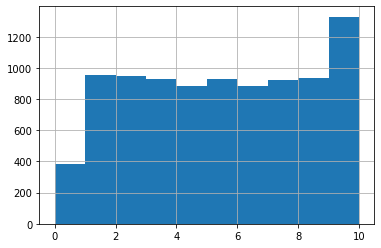

In [9]:
df['Tenure'].hist();

В целом распределение значений имеет плато на значениях от 2 до 9 и рост, но не кардинальный, на значении в 10. Теоретически, можно было бы предположить, что клиенты с пропусками - более старые клиенты, однако это лишь один из вариантов. Медианным значением тоже заполнить как-то неидеально: тогда изменится распределение, пик на значении 10 будет незначителен, а ведь в этом может быть какой-то смысл (или нет): чем более старые клиенты, тем сильнее они могут захотеть уйти из банка. 
    
    Заполним пропуски случайными значениями от 0 до 10, вероятность которых будет заполнена пропорционально появляющимся в столбце.   


In [10]:
#Заполнение пропусков
df['Tenure']=df['Tenure'].fillna(pd.Series(
    random.choices(range(0,11),weights=df['Tenure'].value_counts(normalize=True),k=len(df['Tenure'].isna()))))
#проверяем наличие пропусков
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

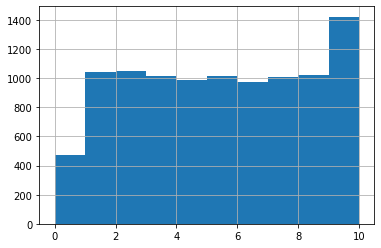

In [11]:
#проверяем распределение по столбцу Tenure
df['Tenure'].hist();

Рассмотрим первые строки датафрейма:

In [12]:
#вывод первых 15 строк
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


При рассмотрении первых строк в глаза не бросаются какие-то аномалии.

Целью исследования является изучение оттока клиентов. Можно предположить, что столбцы RowNumber, CustomerId, Surname не являются решающими и можно их удалить для облегчения расчётов, а также для того, чтобы не пришлось преобразовывать в численные значения Surname (Фамилии)

In [13]:
#исключение столбцов
df=df.drop(['RowNumber','CustomerId','Surname'] , axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Теперь можно приступить к преобразованию категориальных переменных (Столбцы **Geography, Gender**) в численные методом прямого кодирования.

In [14]:
#применение метода прямого кодирования
df=pd.get_dummies(df,prefix=['Geography','Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Исследование задачи

### Исследование баланса классов

Рассмотрим соотношение классов по столбцу Balance:

In [15]:
df.groupby('Exited').count()['Balance']

Exited
0    7963
1    2037
Name: Balance, dtype: int64

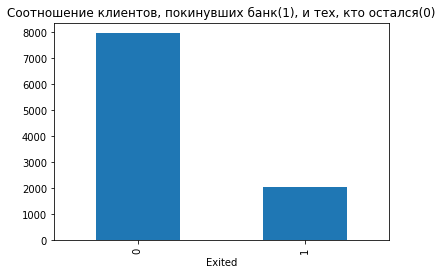

In [16]:
df.groupby('Exited').count()['Balance'].plot.bar(title='Соотношение клиентов, покинувших банк(1), и тех, кто остался(0)');

Как видно, существует дисбаланс классов: число ушедших клиентов в 4 раза меньше, чем число тех, кто остался. Обучим модель без учёта дисбаланса и оценим результаты.

In [17]:
#разделение выборок на обучающую, валидацоинную и тестовую в соотношении 60:20:20
target = df['Exited']
features = df.drop(['Exited'] , axis=1)
features_train, features_validtest, target_train, target_validtest = train_test_split(
    features, target, train_size=0.6, random_state=RS,stratify=target)

features_valid,features_test,target_valid,target_test=train_test_split(
features_validtest,target_validtest,train_size=0.5,random_state=RS,stratify=target_validtest)

#сохраняем перечень численных признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#обучение инструмента масштабирования
scaler=StandardScaler()
scaler.fit(features_train[numeric])

#масштабирование численных признаков
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

In [18]:
#Создание списков результатов для разных моделей для наглядного вывода результатов
#Название модели
model_name=[]
#название метода эксперимента
method_name=[]
#f1-мера
model_f1_res=[]
#AUC-ROC
model_AR_res=[]

Обучение модели логистической регрессии

In [19]:
model_1=LogisticRegression(random_state=RS)
model_1.fit(features_train,target_train)
model_1_f1=f1_score(target_valid,model_1.predict(features_valid))
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_1_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_1_f1)
print('AUC-ROC:',model_1_AR)

#запись результатов для итоговой таблицы
model_name.append('Логистическая регрессия')
method_name.append('Без баланса')
model_f1_res.append(model_1_f1)
model_AR_res.append(model_1_AR)

F1-мера: 0.3107861060329068
AUC-ROC: 0.787502155384767


Вывод: для модели линейной регрессии для несбалансированных классов и стандартных гиперпараметров F1-мера равняется 0.30, а метрика AUC-ROC 0.79

Обучение модели дерева решений

In [20]:
model_2=DecisionTreeClassifier(random_state=RS)
model_2.fit(features_train,target_train)
model_2_f1=f1_score(target_valid,model_2.predict(features_valid))
probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_2_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_2_f1)
print('AUC-ROC:',model_2_AR)

#запись результатов для итоговой таблицы
model_name.append('Дерево решений')
method_name.append('Без баланса')
model_f1_res.append(model_2_f1)
model_AR_res.append(model_2_AR)

F1-мера: 0.5197604790419162
AUC-ROC: 0.6999765986796729


Вывод: для модели дерева решений для несбалансированных классов и стандартных гиперпараметров F1-мера равняется 0.52, а метрика AUC-ROC 0.70

Обучение модели случайного леса

In [21]:
model_3=RandomForestClassifier(random_state=RS)
model_3.fit(features_train,target_train)
model_3_f1=f1_score(target_valid,model_3.predict(features_valid))
probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_3_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_3_f1)
print('AUC-ROC:',model_3_AR)

#запись результатов для итоговой таблицы
model_name.append('Случайный лес')
method_name.append('Без баланса')
model_f1_res.append(model_3_f1)
model_AR_res.append(model_3_AR)

F1-мера: 0.6228070175438597
AUC-ROC: 0.8601971253325451


Вывод: для модели случайного леса для несбалансированных классов и стандартных гиперпараметров F1-мера равняется 0.59, а метрика AUC-ROC 0.86

In [22]:
#Вывод сравнительных результатов
results=pd.DataFrame({'модель':model_name,'метод':method_name,'F1-мера':model_f1_res,'AUC-ROC':model_AR_res})
results

,модель,метод,F1-мера,AUC-ROC
0,Логистическая регрессия,Без баланса,0.310786,0.787502
1,Дерево решений,Без баланса,0.519760,0.699977
2,Случайный лес,Без баланса,0.622807,0.860197


**Вывод по моделям общий для несбалансированных классов:** Наибольшие значения метрик F1-меры и AUC-ROC показывает модель случайного леса. Попробуем устранить дисбаланс классов.

## Борьба с дисбалансом

Попробуем перебрать различные методы балансирования классов: взвешивание классов, увеличение выборки, уменьшение выборки и изменение порога для всех трёх моделей.

### Взвешивание классов

Обучение модели логистической регрессии

In [23]:
model_1=LogisticRegression(random_state=RS, solver='liblinear', class_weight='balanced')
model_1.fit(features_train,target_train)
model_1_f1=f1_score(target_valid,model_1.predict(features_valid))
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_1_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_1_f1)
print('AUC-ROC:',model_1_AR)

#запись результатов для итоговой таблицы
model_name.append('Логистическая регрессия')
method_name.append('Взвешивание')
model_f1_res.append(model_1_f1)
model_AR_res.append(model_1_AR)

F1-мера: 0.5294635004397538
AUC-ROC: 0.793697347029264


Обучение модели дерева решений

In [24]:
model_2=DecisionTreeClassifier(random_state=RS, class_weight='balanced')
model_2.fit(features_train,target_train)
model_2_f1=f1_score(target_valid,model_2.predict(features_valid))
probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_2_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_2_f1)
print('AUC-ROC:',model_2_AR)

#запись результатов для итоговой таблицы
model_name.append('Дерево решений')
method_name.append('Взвешивание')
model_f1_res.append(model_2_f1)
model_AR_res.append(model_2_AR)

F1-мера: 0.5297691373025515
AUC-ROC: 0.7052850034486156


Обучение модели случайного леса

In [25]:
model_3=RandomForestClassifier(random_state=RS,class_weight='balanced')
model_3.fit(features_train,target_train)
model_3_f1=f1_score(target_valid,model_3.predict(features_valid))
probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_3_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_3_f1)
print('AUC-ROC:',model_3_AR)

#запись результатов для итоговой таблицы
model_name.append('Случайный лес')
method_name.append('Взвешивание')
model_f1_res.append(model_3_f1)
model_AR_res.append(model_3_AR)

F1-мера: 0.5927051671732523
AUC-ROC: 0.862166223273229


In [26]:
#Вывод сравнительных результатов
results=pd.DataFrame({'модель':model_name,'метод':method_name,'F1-мера':model_f1_res,'AUC-ROC':model_AR_res})
results

,модель,метод,F1-мера,AUC-ROC
0,Логистическая регрессия,Без баланса,0.310786,0.787502
1,Дерево решений,Без баланса,0.519760,0.699977
2,Случайный лес,Без баланса,0.622807,0.860197
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
4,Дерево решений,Взвешивание,0.529769,0.705285
5,Случайный лес,Взвешивание,0.592705,0.862166


**Вывод по моделям общий для сбалансированных классов методом взвешвания:** Интересное наблюдение: увеличение F1-меры и метрики AUC-ROC произошло в случае модели логистической регрессии, тогда как для моделей дерева решений и случайного леса результаты незначительно, но ухудшились

### Увеличение выборки

Для увеличения выборки создадим функцию upsample, которая будет получать в качестве аргументов признаки, целевые признаки, количество повторений (копий) с дублированием признаков для target==1.

In [27]:
#создание функции upsample
def upsample(features,target,repeat):
    features_zeros=features[target==0] #делим данные по целевому признаку 0 или 1
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    
    features_upsampled=pd.concat([features_zeros]+[features_ones]*repeat) #увеличиваем число строк с признаками где целевой признак=1
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat) #увеличиваем число строк с целевым признаком=1
    
    features_upsampled,target_upsampled=shuffle(
    features_upsampled,target_upsampled,random_state=RS) #перемешиваем строки
    
    return features_upsampled,target_upsampled   

Увеличиваем обучающую выборку. Дисбаланс классов имеет соотношение 4:1. Есть смысл увеличить класс с ушедшими клиентами банка в 4 раза:

In [28]:
features_upsampled,target_upsampled=upsample(features_train,target_train,4)
#проверка соотношения классов
target_upsampled.mean()

0.5056900475894889

**Теперь проверим на различных моделях** 

Обучение модели логистической регрессии

In [29]:
model_1=LogisticRegression(random_state=RS, solver='liblinear')
model_1.fit(features_upsampled,target_upsampled)
model_1_f1=f1_score(target_valid,model_1.predict(features_valid))
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_1_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_1_f1)
print('AUC-ROC:',model_1_AR)

#запись результатов для итоговой таблицы
model_name.append('Логистическая регрессия')
method_name.append('Увеличение выборки')
model_f1_res.append(model_1_f1)
model_AR_res.append(model_1_AR)

F1-мера: 0.5242214532871973
AUC-ROC: 0.7937589294511775


Обучение модели дерева решений

In [30]:
model_2=DecisionTreeClassifier(random_state=RS)
model_2.fit(features_upsampled,target_upsampled)
model_2_f1=f1_score(target_valid,model_2.predict(features_valid))
probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_2_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_2_f1)
print('AUC-ROC:',model_2_AR)

#запись результатов для итоговой таблицы
model_name.append('Дерево решений')
method_name.append('Увеличение выборки')
model_f1_res.append(model_2_f1)
model_AR_res.append(model_2_AR)

F1-мера: 0.5122549019607843
AUC-ROC: 0.6936274509803921


Обучение модели случайного леса

In [31]:
model_3=RandomForestClassifier(random_state=RS)
model_3.fit(features_upsampled,target_upsampled)
model_3_f1=f1_score(target_valid,model_3.predict(features_valid))
probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_3_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_3_f1)
print('AUC-ROC:',model_3_AR)

#запись результатов для итоговой таблицы
model_name.append('Случайный лес')
method_name.append('Увеличение выборки')
model_f1_res.append(model_3_f1)
model_AR_res.append(model_3_AR)

F1-мера: 0.6205059920106524
AUC-ROC: 0.8610746748448124


In [32]:
#Вывод сравнительных результатов
results=pd.DataFrame({'модель':model_name,'метод':method_name,'F1-мера':model_f1_res,'AUC-ROC':model_AR_res})
results

,модель,метод,F1-мера,AUC-ROC
0,Логистическая регрессия,Без баланса,0.310786,0.787502
1,Дерево решений,Без баланса,0.519760,0.699977
2,Случайный лес,Без баланса,0.622807,0.860197
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
4,Дерево решений,Взвешивание,0.529769,0.705285
5,Случайный лес,Взвешивание,0.592705,0.862166
6,Логистическая регрессия,Увеличение выборки,0.524221,0.793759
7,Дерево решений,Увеличение выборки,0.512255,0.693627
8,Случайный лес,Увеличение выборки,0.620506,0.861075


**Вывод по моделям общий для сбалансированных классов методом увеличения выборки:** Относительно применения метода взвешивания улучшение параметров заметно только для модели случайного леса. Для моделей логистической регрессии и дерева решений метод увеличения выборки показывает незначительно, но худшие результаты, чем для метода взвешивания.

### Уменьшение выборки

Попробуем уменьшить размер преобладающего класса в обучающей выборке. Для этого создадим функцию downsample и уменьшим в 4 раза количество строк с клиентами, не ушедшими из банка.

In [33]:
#Создание функции downsample
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RS)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RS)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RS)
    
    return features_downsampled, target_downsampled

#применение функции к увеличенному классу
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
#проверка соотношения классов
target_upsampled.mean()

0.5056900475894889

**Теперь проверим на различных моделях** 

Обучение модели логистической регрессии

In [34]:
model_1=LogisticRegression(random_state=RS, solver='liblinear')
model_1.fit(features_downsampled,target_downsampled)
model_1_f1=f1_score(target_valid,model_1.predict(features_valid))
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_1_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_1_f1)
print('AUC-ROC:',model_1_AR)

#запись результатов для итоговой таблицы
model_name.append('Логистическая регрессия')
method_name.append('Уменьшение выборки')
model_f1_res.append(model_1_f1)
model_AR_res.append(model_1_AR)

F1-мера: 0.5275862068965517
AUC-ROC: 0.7926997117942653


Обучение модели дерева решений

In [35]:
model_2=DecisionTreeClassifier(random_state=RS)
model_2.fit(features_downsampled,target_downsampled)
model_2_f1=f1_score(target_valid,model_2.predict(features_valid))
probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_2_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_2_f1)
print('AUC-ROC:',model_2_AR)

#запись результатов для итоговой таблицы
model_name.append('Дерево решений')
method_name.append('Уменьшение выборки')
model_f1_res.append(model_2_f1)
model_AR_res.append(model_2_AR)

F1-мера: 0.5016611295681064
AUC-ROC: 0.714947285446842


Обучение модели случайного леса

In [36]:
model_3=RandomForestClassifier(random_state=RS)
model_3.fit(features_downsampled,target_downsampled)
model_3_f1=f1_score(target_valid,model_3.predict(features_valid))
probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_3_AR=roc_auc_score(target_valid,probabilities_one_valid)
print('F1-мера:',model_3_f1)
print('AUC-ROC:',model_3_AR)

#запись результатов для итоговой таблицы
model_name.append('Случайный лес')
method_name.append('Уменьшение выборки')
model_f1_res.append(model_3_f1)
model_AR_res.append(model_3_AR)

F1-мера: 0.6022304832713754
AUC-ROC: 0.8536316693762933


In [37]:
#Вывод сравнительных результатов
results=pd.DataFrame({'модель':model_name,'метод':method_name,'F1-мера':model_f1_res,'AUC-ROC':model_AR_res})
results

,модель,метод,F1-мера,AUC-ROC
0,Логистическая регрессия,Без баланса,0.310786,0.787502
1,Дерево решений,Без баланса,0.519760,0.699977
2,Случайный лес,Без баланса,0.622807,0.860197
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
4,Дерево решений,Взвешивание,0.529769,0.705285
5,Случайный лес,Взвешивание,0.592705,0.862166
6,Логистическая регрессия,Увеличение выборки,0.524221,0.793759
7,Дерево решений,Увеличение выборки,0.512255,0.693627
8,Случайный лес,Увеличение выборки,0.620506,0.861075
9,Логистическая регрессия,Уменьшение выборки,0.527586,0.792700


**Вывод по моделям общий для сбалансированных классов методом уменьшения выборки:** Относительно предыдущего метода балансирования классов (увеличение выборки) для наиболее перспективной модели случайного леса результат f1-меры отличается незначительно, но AUC-ROC принимает наибольшее значение.

### Изменение порога

Рассмотрим f1-меру и значение AUC-ROC для разных значений порога для всех моделей:

Обучение модели логистической регрессии

In [38]:
#обучение модели
model_1=LogisticRegression(random_state=RS, solver='liblinear')
model_1.fit(features_train,target_train)
probabilities_valid=model_1.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]

#переменные для записи максимальных значений по f1-мере
treshold_max=0
model_1_f1_max=0
model_1_AR_max=0

#цикл для поиска максимальной f1-меры в зависимости от разных значений порога
for threshold in np.arange(0,0.5,0.01):
    predicted_valid=probabilities_one_valid>threshold
    model_1_f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model_1.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    model_1_AR=roc_auc_score(target_valid,probabilities_one_valid)
    if model_1_f1>model_1_f1_max:
        treshold_max=threshold
        model_1_f1_max=model_1_f1
        model_1_AR_max=model_1_AR
        
#вывод значения максимального по f1_мере:        
print('порог:',treshold_max)
print('F1-мера:',model_1_f1_max)
print('AUC-ROC:',model_1_AR_max)
print('')

#запись результатов для итоговой таблицы
model_name.append('Логистическая регрессия')
method_name.append('Изменение порога')
model_f1_res.append(model_1_f1_max)
model_AR_res.append(model_1_AR_max)

порог: 0.23
F1-мера: 0.5265116279069767
AUC-ROC: 0.7875021553847669



Обучение модели дерева решений

In [39]:
#обучение модели
model_2=DecisionTreeClassifier(random_state=RS)
model_2.fit(features_train,target_train)
probabilities_valid=model_2.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]

#переменные для записи максимальных значений по f1-мере
treshold_max=0
model_2_f1_max=0
model_2_AR_max=0

#цикл для поиска максимальной f1-меры в зависимости от разных значений порога
for threshold in np.arange(0,0.5,0.01):
    predicted_valid=probabilities_one_valid>threshold
    model_2_f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model_2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    model_2_AR=roc_auc_score(target_valid,probabilities_one_valid)
    if model_2_f1>model_2_f1_max:
        treshold_max=threshold
        model_2_f1_max=model_2_f1
        model_2_AR_max=model_2_AR
        
#вывод значения максимального по f1_мере:        
print('порог:',treshold_max)
print('F1-мера:',model_2_f1_max)
print('AUC-ROC:',model_2_AR_max)
print('')

#запись результатов для итоговой таблицы
model_name.append('Дерево решений')
method_name.append('Изменение порога')
model_f1_res.append(model_2_f1_max)
model_AR_res.append(model_2_AR_max)

порог: 0.0
F1-мера: 0.5197604790419162
AUC-ROC: 0.6999765986796729



Обучение модели случайного леса

In [40]:
#обучение модели
model_3=RandomForestClassifier(random_state=RS)
model_3.fit(features_train,target_train)
probabilities_valid=model_3.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]

#переменные для записи максимальных значений по f1-мере
treshold_max=0
model_3_f1_max=0
model_3_AR_max=0

#цикл для поиска максимальной f1-меры в зависимости от разных значений порога
for threshold in np.arange(0,0.45,0.01):
    predicted_valid=probabilities_one_valid>threshold
    model_3_f1=f1_score(target_valid,predicted_valid)
    probabilities_valid = model_3.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    model_3_AR=roc_auc_score(target_valid,probabilities_one_valid)
    if model_3_f1>model_3_f1_max:
        treshold_max=threshold
        model_3_f1_max=model_3_f1
        model_3_AR_max=model_3_AR
        
#вывод значения максимального по f1_мере:        
print('порог:',treshold_max)
print('F1-мера:',model_3_f1_max)
print('AUC-ROC:',model_3_AR_max)


#запись результатов для итоговой таблицы
model_name.append('Случайный лес')
method_name.append('Изменение порога')
model_f1_res.append(model_3_f1_max)
model_AR_res.append(model_3_AR_max)

порог: 0.41000000000000003
F1-мера: 0.642570281124498
AUC-ROC: 0.8601971253325451


### Результаты на валидационной выборке

Выведем полученные результаты по всем экспериментам:

In [41]:
#Вывод сравнительных результатов
results=pd.DataFrame({'модель':model_name,'метод':method_name,'F1-мера':model_f1_res,'AUC-ROC':model_AR_res})
results

,модель,метод,F1-мера,AUC-ROC
0,Логистическая регрессия,Без баланса,0.310786,0.787502
1,Дерево решений,Без баланса,0.519760,0.699977
2,Случайный лес,Без баланса,0.622807,0.860197
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
4,Дерево решений,Взвешивание,0.529769,0.705285
5,Случайный лес,Взвешивание,0.592705,0.862166
6,Логистическая регрессия,Увеличение выборки,0.524221,0.793759
7,Дерево решений,Увеличение выборки,0.512255,0.693627
8,Случайный лес,Увеличение выборки,0.620506,0.861075
9,Логистическая регрессия,Уменьшение выборки,0.527586,0.792700


И в порядке убывания по f1-мере:

In [42]:
results.sort_values(by='F1-мера',ascending=False)

,модель,метод,F1-мера,AUC-ROC
14,Случайный лес,Изменение порога,0.642570,0.860197
2,Случайный лес,Без баланса,0.622807,0.860197
8,Случайный лес,Увеличение выборки,0.620506,0.861075
11,Случайный лес,Уменьшение выборки,0.602230,0.853632
5,Случайный лес,Взвешивание,0.592705,0.862166
4,Дерево решений,Взвешивание,0.529769,0.705285
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
9,Логистическая регрессия,Уменьшение выборки,0.527586,0.792700
12,Логистическая регрессия,Изменение порога,0.526512,0.787502
6,Логистическая регрессия,Увеличение выборки,0.524221,0.793759


**Вывод:**

Наивысшие показатели f1-меры - у модели случайного леса. При этом сравнивая между собой методы балнсирования классов можно заметить, что лучше всех показал себя метод **изменения порога**, **увеличение, уменьшение выборки и использование исходной несбалансированной модели** показали примерно одинаковое значение показателя, а **взвешивание** наоборот, ухудшило показания. Максимальное значение f1-меры - 0.65.

Значение AUC-ROC также наивысшее у модели случайного леса с методом балансирования **изменение порога**. 

Стоит отметить, что метод **без балансирования** хуже всего показал себя на обучение модели методом логистической регрессии: значение f1-меры 0.3, тогда как в остальных случаях оно было мнимально 0.49. Таким образом, можно сказать, что модель логистической регрессии наиболее чувствительна к дисбалансу классов. При этом в одном случае логистическая регрессия показала себя неожиданно хорошо: при балансировании выборки методом **взвешивания** значение f1-меры было  сопоставимо с результатами модели логистической регрессии.

По результатам исследования видно, что наибольшее значение f1-меры показывает модель случайного дерева с балансированием классов путём изменения порога. Попробуем улучшить модель с помощью подбора гиперпараметров. 

In [43]:
#обучение модели
best_model_3=None
best_model_3_f1=0
best_model_3_AR=0
best_depth=0
best_n_estimators=0
best_threshold=0

for depth in range(8,11):
    for estimators in tqdm(range(43,45)):
        for threshold in np.arange(0.3,0.4,0.01):
            model_3=RandomForestClassifier(random_state=RS,max_depth=depth, n_estimators=estimators)
            model_3.fit(features_train,target_train)
            probabilities_valid=model_3.predict_proba(features_valid)
            probabilities_one_valid=probabilities_valid[:,1]
            predicted_valid=probabilities_one_valid>threshold
            model_3_f1=f1_score(target_valid,predicted_valid)
            model_3_AR=roc_auc_score(target_valid,predicted_valid)
            if model_3_f1>best_model_3_f1:
                best_model_3=model_3
                best_model_3_f1=model_3_f1
                best_model_3_AR=model_3_AR
                best_depth=depth
                best_n_estimators=estimators  
                best_treshold=threshold
            
#вывод значений:   
print('F1-мера:',best_model_3_f1)
print('AUC-ROC:',best_model_3_AR)
print('max_depth:',best_depth)
print('n_estimators',best_n_estimators)
print('порог:',best_treshold)

100%|██████████| 2/2 [00:06<00:00,  3.01s/it]

F1-мера: 0.6523929471032746
AUC-ROC: 0.7775150261109468
max_depth: 8
n_estimators 44
порог: 0.32


По результатам подбора гиперпараметров получено незначительное, но всё-таки увеличение f1-меры (0.665 против 0.648) и увеличение значения auc-roc (0.782 против 0.781)

## Тестирование модели

Приступим к проверке наилучшей модели на тестовой выборке. Напомним: лучше всего себя показала модель **случайного леса (model_3)** с изменением порога до значения 0.35, max_depth=11, n_estimators=43. Возьмём модель из предыдущего пункта best_model_3.

In [44]:
#предсказание по модели best_model_3 и изменение порога 
probabilities_test=best_model_3.predict_proba(features_test)
probabilities_one_test=probabilities_test[:,1]
predicted_test=probabilities_one_test>best_treshold

#подсчет результатов f1, auc_roc на тестовой выборке
model_3_f1=f1_score(target_test,predicted_test)
model_3_AR=roc_auc_score(target_test,predicted_test)
      
#вывод значений:   
print('F1-мера:',model_3_f1)
print('AUC-ROC:',model_3_AR)

F1-мера: 0.5952380952380952
AUC-ROC: 0.7374925002043645


Выполнено условие о достижении значения f1-меры в 0.59.

## Вывод

По результатам исследования различных моделей предсказания оттока клиентов банка получено следующее:
    
    Лучше всех на валидационной выборке себя показала модель случайного леса с балансированием классов по методу изменения порога. При этом в целом можно утверждать о том, что модель случайного леса показвыает себя лучше остальных при любом из показанных методов балансирования классов, а также без балансирования вообще.
    
    Худший результат без баланса классов показала модель логистической регрессии (f1-мера=0.3), хотя при выполнении баланса модель уже становится пригодной и показывает средние результаты.
    
    На тестовой выборке достигнуто значение f1-меры в 0.60, однако для этого необходимо было подобрать гиперпараметры модели случайного леса.
    
    Значения AUC-ROC для моделей ведёт себя аналогично значениям f1-меры: наибольшие значени принимают для модели случайного леса, затем - дерева решений, затем - логистической регрессии.   

In [42]:
#вывод общих результатов
results.sort_values(by='F1-мера',ascending=False)

,модель,метод,F1-мера,AUC-ROC
14,Случайный лес,Изменение порога,0.642570,0.860197
2,Случайный лес,Без баланса,0.622807,0.860197
8,Случайный лес,Увеличение выборки,0.620506,0.861075
11,Случайный лес,Уменьшение выборки,0.602230,0.853632
5,Случайный лес,Взвешивание,0.592705,0.862166
4,Дерево решений,Взвешивание,0.529769,0.705285
3,Логистическая регрессия,Взвешивание,0.529464,0.793697
9,Логистическая регрессия,Уменьшение выборки,0.527586,0.792700
12,Логистическая регрессия,Изменение порога,0.526512,0.787502
6,Логистическая регрессия,Увеличение выборки,0.524221,0.793759


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*